In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph.message import add_messages
load_dotenv()

True

In [9]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [10]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [11]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [12]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

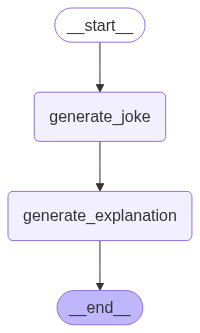

In [14]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [15]:
config = {"configurable": {"thread_id": "1"}}

workflow.invoke({'topic': 'cats'}, config=config)

{'topic': 'cats',
 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.',
 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}

In [16]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-23ef-6cb5-8002-001f80c190e5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at=

In [17]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe joke requires a basic understanding of music and the role of a percussionist, as well as familiarity with cat sounds and behavior. The humor comes from the unexpected twist on the word "percussionist" and the clever way it incorporates the cat\'s purring sound, creating a clever and punny connection between the cat and its potential role in the band.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-23ef-6cb5-8002-001f80c190e5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at

In [18]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.',
 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to therapy") and the p

In [19]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.', 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to 

In [21]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and had a lot of "saucy" issues to work through.', 'explanation': 'The joke is a play on words, using puns to create a humorous effect. Here\'s a breakdown of the explanation:\n\n- "Twisted" is a common phrase that can mean a person is feeling a bit confused, anxious, or upset. In this context, it\'s used to describe the spaghetti, which is literally twisted or tangled, referencing its curly shape. This double meaning creates a clever wordplay.\n\n- "Saucy" is a colloquial term used to describe someone or something that\'s a bit cheeky or flirtatious. However, in this joke, it\'s also a reference to the fact that spaghetti is typically served with a tomato-based sauce. This pun connects the word "saucy" to the food item, the spaghetti.\n\nBy combining these two puns, the joke creates a clever and unexpected connection between the setup ("spaghetti went to

### Time Travel

In [22]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f074467-2020-69aa-8001-acae70289a36"}})

StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.'}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f074467-2020-69aa-8001-acae70289a36'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T10:57:15.775412+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-08fd-6549-8000-407da77d27d0'}}, tasks=(PregelTask(id='700e835f-6862-59e2-8485-b0aa3133054d', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result={'explanation': 'The joke is a play on words. The punchline "purr-cussionist" is a pun on the word "percussionist," which is a type of musician who plays percussion instruments, such as drums. However, "purr-cussionist" incorporates the sound a cat makes, a "purr," to create a cat-themed pun.\n\nThe jo

In [23]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f074467-2020-69aa-8001-acae70289a36"}})

{'topic': 'cats',
 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.',
 'explanation': 'The joke relies on a play on words. The word "purr-cussionist" sounds similar to the word "percussionist," which is a term used to describe a musician who plays percussion instruments, such as drums or cymbals.\n\nHowever, the word "purr-cussionist" is also a pun because it incorporates the characteristic sound cats make, known as a purr, into the word. This wordplay creates a clever connection between the cat\'s identity as a feline and its desire to join a band as a percussionist.\n\nThe joke\'s humor comes from the unexpected twist on the typical term "percussionist" and the clever use of language to incorporate the cat\'s unique sound, making it a lighthearted and amusing play on words.'}

In [24]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke relies on a play on words. The word "purr-cussionist" sounds similar to the word "percussionist," which is a term used to describe a musician who plays percussion instruments, such as drums or cymbals.\n\nHowever, the word "purr-cussionist" is also a pun because it incorporates the characteristic sound cats make, known as a purr, into the word. This wordplay creates a clever connection between the cat\'s identity as a feline and its desire to join a band as a percussionist.\n\nThe joke\'s humor comes from the unexpected twist on the typical term "percussionist" and the clever use of language to incorporate the cat\'s unique sound, making it a lighthearted and amusing play on words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07447d-637f-60bd-8002-8feca2408573'}}, metadata={'source': 

### Updating State

In [25]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f074467-08fd-6549-8000-407da77d27d0", "checkpoint_ns": ""}}, {'topic':'dogs'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f074481-1b4f-6b78-8001-1ee772f966ed'}}

In [26]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'dogs'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074481-1b4f-6b78-8001-1ee772f966ed'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-08T11:08:53.202603+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074467-08fd-6549-8000-407da77d27d0'}}, tasks=(PregelTask(id='cc4990ec-5505-4a03-da7d-28a73f36517b', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'cats', 'joke': 'Why did the cat join a band? \n\nBecause it wanted to be the purr-cussionist.', 'explanation': 'The joke relies on a play on words. The word "purr-cussionist" sounds similar to the word "percussionist," which is a term used to describe a musician who plays percussion instruments, such as drums or cymbals.\n\nHowev

In [28]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f074481-1b4f-6b78-8001-1ee772f966ed"}})

{'topic': 'dogs',
 'joke': 'Why did the dog go to the vet? \n\nBecause he was feeling a little ruff.',
 'explanation': 'This joke is a play on words. The phrase "feeling a little ruff" has a double meaning here. \n\nIn one sense, "ruff" refers to the sound a dog makes, often written as "ruff ruff." So, the phrase "feeling a little ruff" could imply that the dog is feeling a bit anxious or upset, as if it\'s barking or whining.\n\nHowever, "ruff" also sounds similar to the word "rough," which means uncomfortable or difficult to handle. So, in this context, "feeling a little ruff" could also imply that the dog is feeling unwell or uncomfortable.\n\nThe punchline of the joke is that the dog went to the vet, suggesting that it was indeed feeling unwell. The wordplay on "ruff" creates a pun, which is a form of humor that relies on multiple meanings or sounds of words.'}

In [29]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'dogs', 'joke': 'Why did the dog go to the vet? \n\nBecause he was feeling a little ruff.', 'explanation': 'This joke is a play on words. The phrase "feeling a little ruff" has a double meaning here. \n\nIn one sense, "ruff" refers to the sound a dog makes, often written as "ruff ruff." So, the phrase "feeling a little ruff" could imply that the dog is feeling a bit anxious or upset, as if it\'s barking or whining.\n\nHowever, "ruff" also sounds similar to the word "rough," which means uncomfortable or difficult to handle. So, in this context, "feeling a little ruff" could also imply that the dog is feeling unwell or uncomfortable.\n\nThe punchline of the joke is that the dog went to the vet, suggesting that it was indeed feeling unwell. The wordplay on "ruff" creates a pun, which is a form of humor that relies on multiple meanings or sounds of words.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f074484-0

### Fault Tolerance

In [1]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [2]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [3]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(10)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

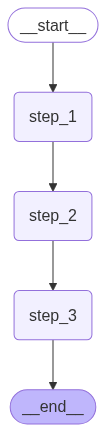

In [4]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
graph

In [5]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed


In [6]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [7]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0744b2-e711-6718-8003-dfd416e2e964'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T11:31:09.901785+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0744b2-e70f-61e5-8002-78cc0717778d'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0744b2-e70f-61e5-8002-78cc0717778d'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': 'thread-1'}, created_at='2025-08-08T11:31:09.900814+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0744b2-87ad-681a-8001-49b990983302'}}, tasks=(